#### Chapter 7: Valution of American Options by Simulation

* Monte Carlo methods are suitable for European pricing simulation since it is forward evolving
* American and Bermudan options can be solved with Least Square Monte Carlo or backward induction techniques
* Longstaff and Schwartz method approximates continuation values for American options in backward steps with OLS
* LSM is a lower bound: an option is exercised if approximate continuation value is lower than immediate exercise
* Haugh and Kogan upper bound MC approximation 


In [2]:
%run 07_amo/CRR_american_options.py

In [3]:
%time CRR_option_valuation(1, 500)

CPU times: user 30.3 ms, sys: 7.06 ms, total: 37.4 ms
Wall time: 37.2 ms


4.4863747775059899

In [4]:
%time CRR_option_valuation(2, 500)

CPU times: user 32.9 ms, sys: 2.86 ms, total: 35.8 ms
Wall time: 36.9 ms


26.977045203891102

In [5]:
%run 07_amo/LSM_primal_valuation.py

American put option value 4.475


In [10]:
import pandas as pd

h5 = pd.HDFStore('07_amo/results_2014-10-15_table.h5', 'r')
results = h5['results']
results.tail()

,AP,AV,AV_se,DUAL,DUAL_se,I1,I2,ITM,J,LSM,LSM_se,M,MM,otype,reg,runs
145,False,26.937517,0.001563,27.742823,0.586408,16384,1024,False,50,26.132210,0.713754,75,True,2,9,25
146,False,26.983474,0.000041,27.502275,0.275861,16384,1024,False,50,26.464673,0.262530,75,True,2,9,25
147,False,27.402932,0.181375,27.743228,0.587028,16384,1024,False,50,27.062636,0.007325,75,True,2,9,25
148,False,27.180415,0.041357,27.451459,0.225064,16384,1024,False,50,26.909371,0.004580,75,True,2,9,25
149,False,26.967802,0.000086,27.418396,0.194787,16384,1024,False,50,26.517208,0.211455,75,True,2,9,25


In [11]:
res = results[(results.otype == 1)  
             # & (results.M == 10)
             & (results.I1 == 16384)
             & (results.I2 == 1024)
             & (results.J == 50)
             & (results.reg == 9)
             & (results.AP == False)
             & (results.MM == True)
             & (results.ITM == False)]

In [12]:
V0_true = 4.48637
def diff(x):
    return np.mean(x) - V0_true

In [13]:
grouped = res.groupby(['otype', 'M', 'I1', 'I2', 'J', 'reg', 'AP', 'MM', 'ITM'])
grouped[['LSM', 'AV', 'DUAL']].agg([max, np.mean, diff, np.median, min]).T

otype               1                    
M                  25        50        75
I1              16384     16384     16384
I2               1024      1024      1024
J                  50        50        50
reg                 9         9         9
AP              False     False     False
MM               True      True      True
ITM             False     False     False
LSM  max     4.526107  4.529452  4.543735
     mean    4.452147  4.470190  4.466950
     diff   -0.034223 -0.016180 -0.019420
     median  4.459270  4.471024  4.474650
     min     4.342221  4.369958  4.390518
AV   max     4.738608  4.603517  4.621614
     mean    4.551757  4.532533  4.532317
     diff    0.065387  0.046163  0.045947
     median  4.546928  4.532072  4.524439
     min     4.485292  4.478896  4.481881
DUAL max     5.017945  4.696514  4.752769
     mean    4.651367  4.594876  4.597683
     diff    0.164997  0.108506  0.111313
     median  4.631951  4.584807  4.574290
     min     4.610128  4.569923  4.552188

In [14]:
# parametrization for M
to_insert = sorted(set(results['M']))
# numerical results
numerics = grouped[['LSM', 'DUAL']].agg([max, np.mean, diff, np.median, min]).values.T
to_insert.extend(numerics.flatten())
# absolute difference between mean primal and dual values
to_insert.extend(np.abs(numerics[1] - numerics[6]))

In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

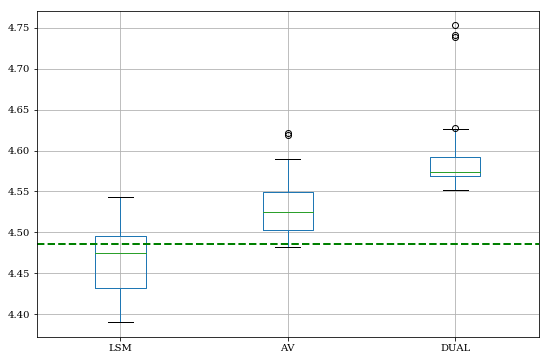

In [21]:
plt.figure(figsize=(9, 6))
res[res.M == 75][['LSM', 'AV', 'DUAL']].boxplot();
plt.axhline(V0_true, color='g', ls='dashed', lw=2.0)

In [22]:
res = results[(results.otype == 2)  
             # & (results.M == 10)
             & (results.I1 == 16384)
             & (results.I2 == 1024)
             & (results.J == 50)
             & (results.reg == 9)
             & (results.AP == False)
             & (results.MM == True)
             & (results.ITM == False)]

In [23]:
V0_true = 26.97705
grouped = res.groupby(['otype', 'M', 'I1', 'I2', 'J', 'reg', 'AP', 'MM', 'ITM'])
grouped[['LSM', 'AV', 'DUAL']].agg([max, np.mean, diff, np.median, min]).T

otype                2                      
M                   25         50         75
I1               16384      16384      16384
I2                1024       1024       1024
J                   50         50         50
reg                  9          9          9
AP               False      False      False
MM                True       True       True
ITM              False      False      False
LSM  max     26.682805  26.709837  27.062636
     mean    25.977307  26.027129  26.308088
     diff    -0.999743  -0.949921  -0.668962
     median  25.945880  25.988614  26.293647
     min     25.180525  25.564437  25.521053
AV   max     29.837145  35.648465  29.464047
     mean    26.931326  27.101877  27.028367
     diff    -0.045724   0.124827   0.051317
     median  26.722923  26.748815  26.963359
     min     26.231485  26.446203  26.574078
DUAL max     33.462468  45.401449  32.415522
     mean    27.885344  28.176625  27.748645
     diff     0.908294   1.199575   0.771595
     median  27.492790  27.478791  27.568544
     min     27.220511  27.230358  27.282115

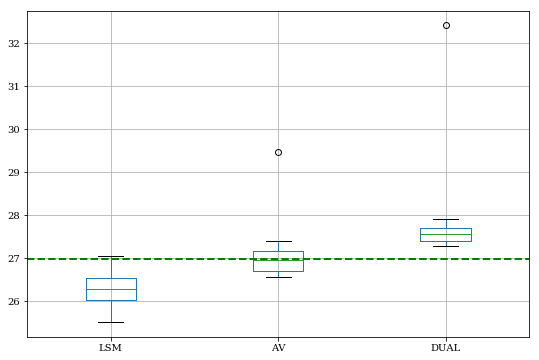

In [25]:
V0_true = 26.97705
plt.figure(figsize=(9, 6))
res[res.M == 75][['LSM', 'AV', 'DUAL']].boxplot();
plt.axhline(V0_true, color='g', ls='dashed', lw=2.0)
